# Метод на най-малките квадрати - допълнителни задачи 

### Задача 1

Моделите на популационната динамика са важен инструмент в изучаването на редица процеси в биологията, медицината, инженерството и др. 
Един много важен математически модел в областта е т. нар. модел на Monod, който описва растежа на дадена популация микроорганизми чрез следното експериментално установено уравнение:

(1) $$ k = k_{max} \frac{S}{K + S}, $$

където\
$k$ се нарича специфична скорост на растеж;\
$k_{max}$ e максималната възможна скорост на растеж за дадения микроорганизъм; \
$S$ e концентрацията на т.нар. лимитиращ субстрат (концентрация на хранителните вещества, намиращи се в реактора,в който се отглежда съответната култура); \
$K$ - константа на насищане - това е стойността на $S$, при която $k/k_{max} = 0.5$.

Стойностите на параметрите $k_{max}$ и $K$ са специфични за отделните видове микроорганизми и зависят от средата, в която те се отглеждат.

В таблицата по-долу са дадени измервания за $k$ и $S$ за популация от Saccharomyces cerevisiae - мая, която се използва в порцеса на ферментация при производството на бира

| S (mg/L) | 7 | 9 | 15 | 25 | 40 | 75 | 100 | 150 |
| --- | --- | --- | --- |--- | --- | --- | ---| --- |
| k (1 / t) | 0.29 | 0.37 | 0.48 | 0.65 | 0.80 | 0.97 | 0.99 | 1.07| 

Като се използват данните от таблицата, да се намерят стойности на параметрите $k_{max}$ и $K$ по метода на най-малките квадрати, като за целта предварително се направи подходяща линеаризация на (1) ( да се направи подходящо преобразование, така че неизвестните параметри да участват линейно във връзката).

In [3]:
import numpy as np
from sympy import diff, solve, Eq, symbols
import matplotlib.pyplot as plt

In [13]:
S = np.array([7, 9, 15, 25, 40, 75, 100, 150])
k = np.array([0.29, 0.37, 0.48, 0.65, 0.80, 0.97, 0.99, 1.07])
size = k.size

A, B = symbols('A, B')

In [15]:
#k = k_max * S / (S + K) -> 1/k = (S + K) / (k_max * S)
# 1 / k = 1/k_max + K/k_max * 1/S
# 1 / k = A + B * (1 / S)
# A = 1 / k_max --> k_max =  1 / A
# B = K / k_max -- > K = B * k_max

def f(A, B, x):
    return A + B * x

def phi(A, B):
    sums_of_squares = 0
    for i in range(size):
        sums_of_squares += (f(A, B, (1 / S[i])) - (1 / k[i])) ** 2
    return sums_of_squares

equations = [
    Eq(diff(phi(A, B), A), 0),
    Eq(diff(phi(A, B), B), 0)
]

sol = solve(equations)

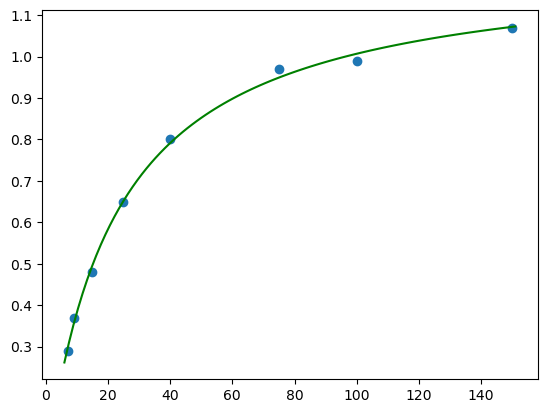

In [21]:
def expr_func(x):
    k_max =  1 / sol[A]
    K = k_max * sol[B]
    return k_max * x / (x + K)

x_axis = np.linspace(6, 151, 100)
plt.scatter(S, k)
plt.plot(x_axis, expr_func(x_axis), color = 'green')
plt.show()